In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d = pd.read_csv('/Users/shriya/Documents/GitHub/logo_detect/ChurnPrediction/data/data.csv')
d.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
d.columns
d.drop('customerID', axis=1, inplace=True)

In [4]:
d.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
d.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
d.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

***Value encoding***

In [7]:
d.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Exploratory Data Analysis**

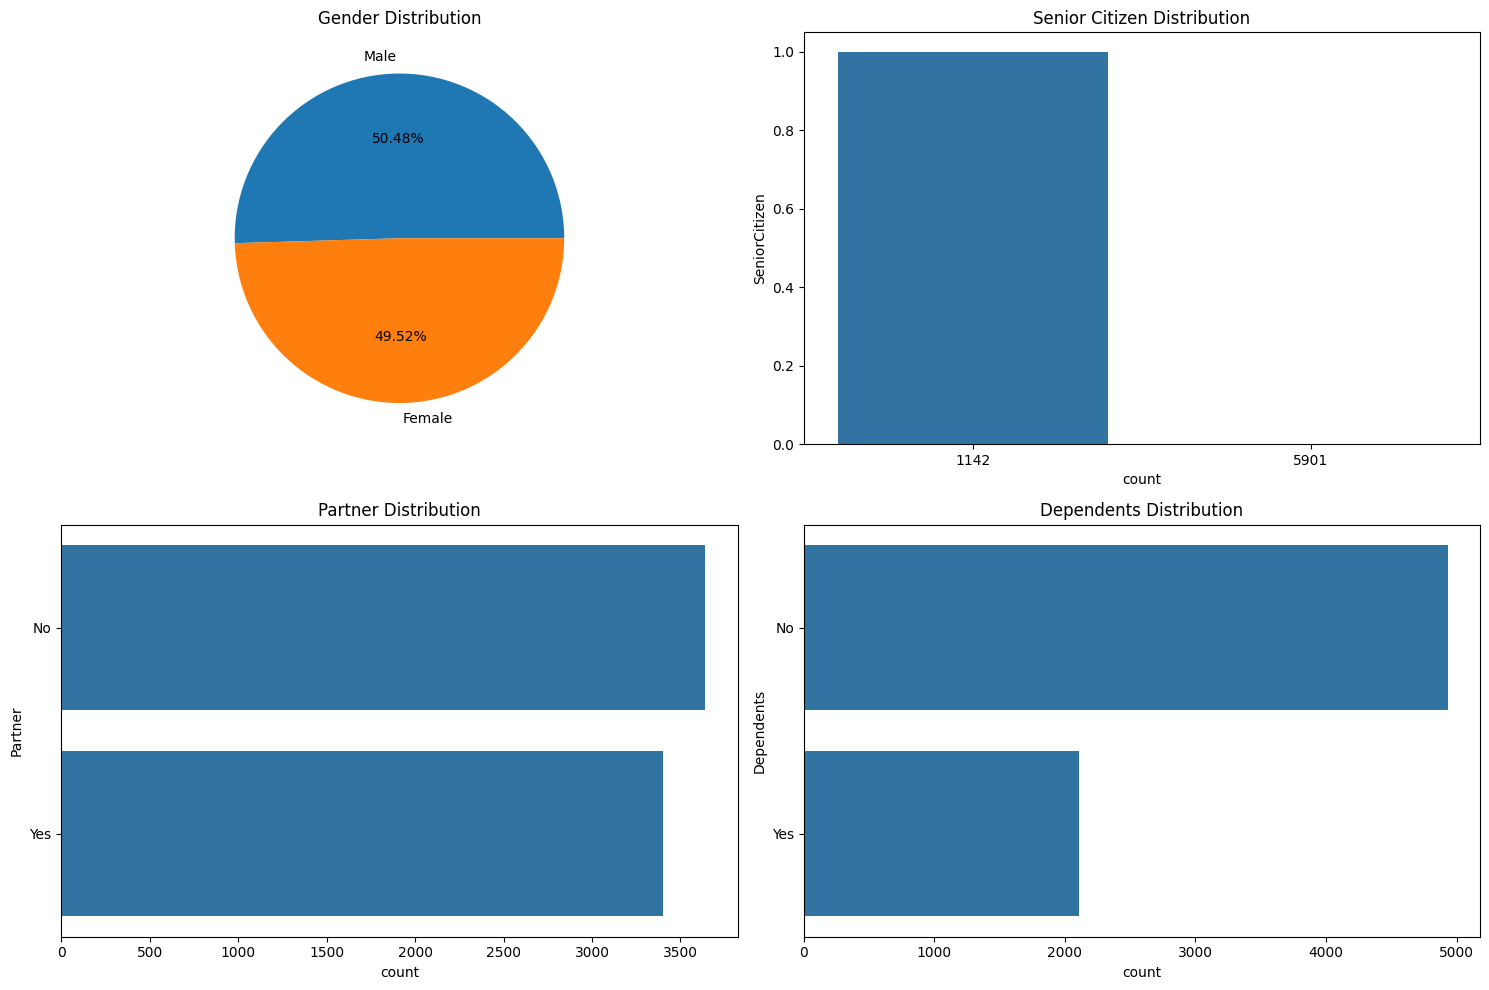

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0,0].pie(d['gender'].value_counts(), labels= ['Male' , 'Female'], autopct = '%1.2f%%')
ax[0,0].set_title('Gender Distribution')

sns.barplot(y=d['SeniorCitizen'].value_counts().index, x=d['SeniorCitizen'].value_counts(), ax=ax[0,1])
ax[0,1].set_title('Senior Citizen Distribution')

sns.barplot(y=d['Partner'].value_counts().index, x=d['Partner'].value_counts(), ax=ax[1,0])
ax[1,0].set_title('Partner Distribution')

sns.barplot(y=d['Dependents'].value_counts().index, x=d['Dependents'].value_counts(), ax=ax[1,1])
ax[1,1].set_title('Dependents Distribution')


plt.tight_layout()
plt.show()


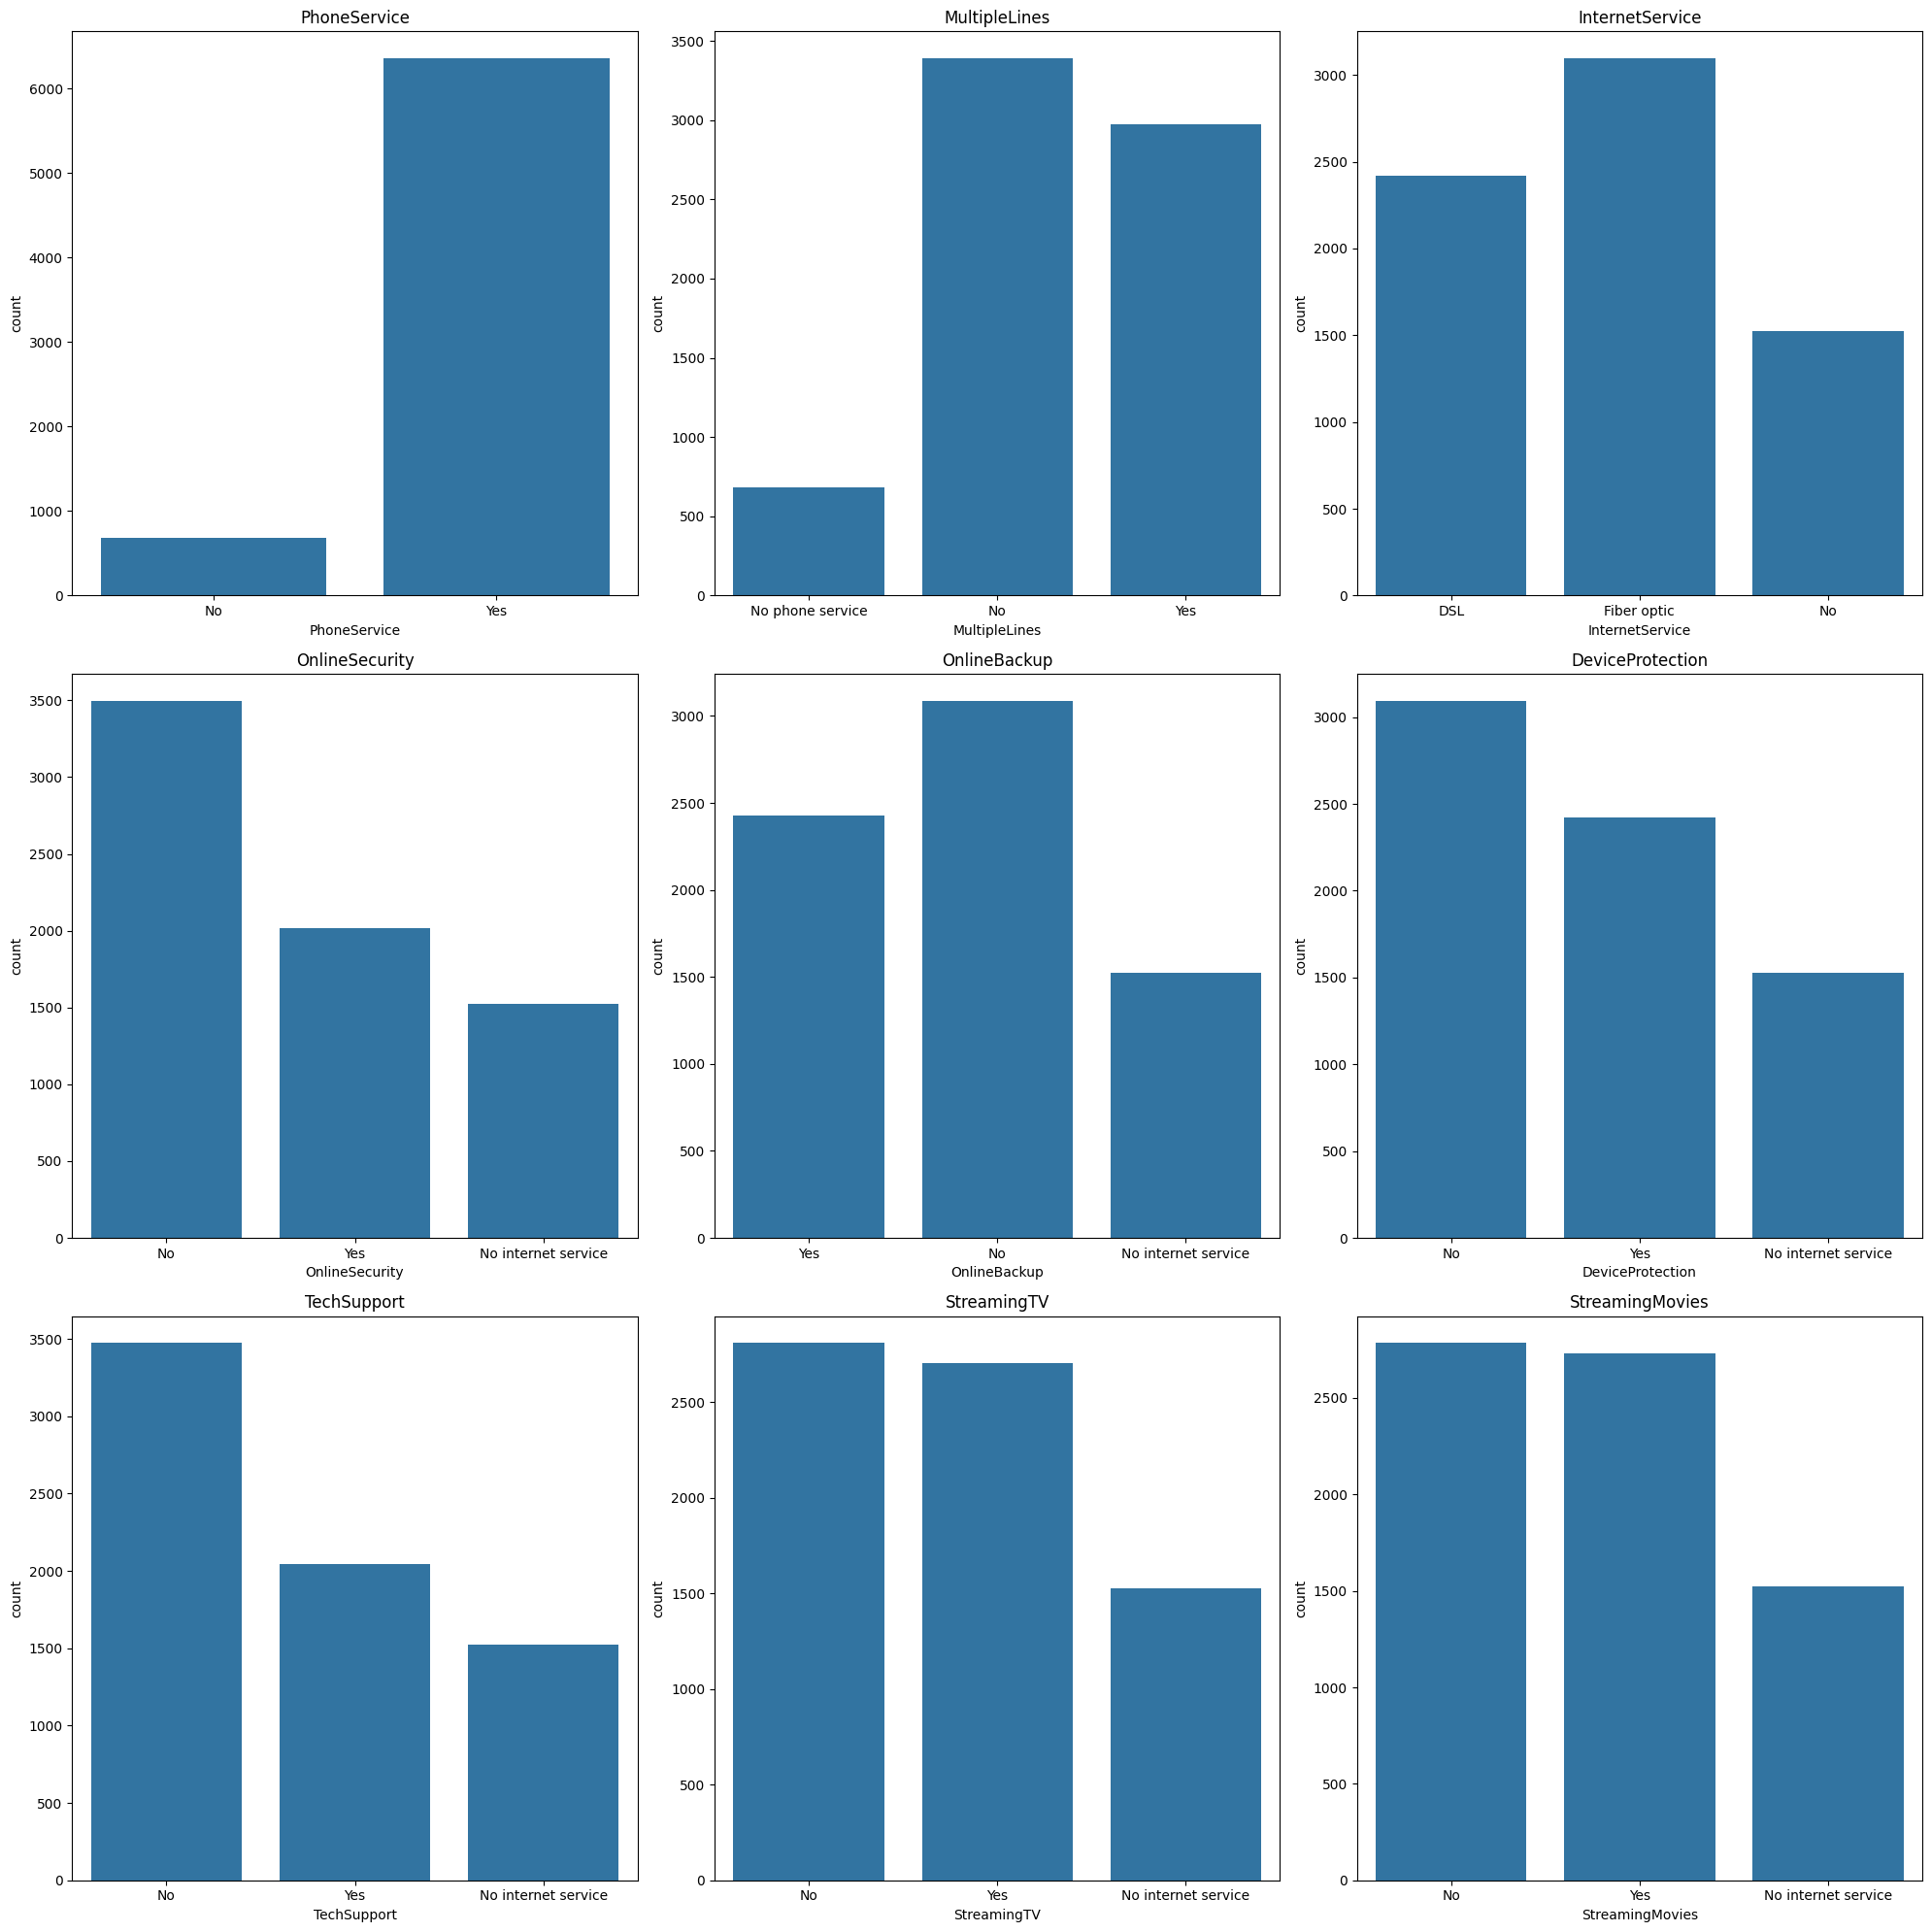

In [9]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
service = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for idx , service in enumerate(service) :
    
    r = idx // 3
    c = idx % 3
    sns.countplot(x=d[service], ax=ax[r, c])
    ax[r, c].set_title(service)

plt.tight_layout()
plt.show()


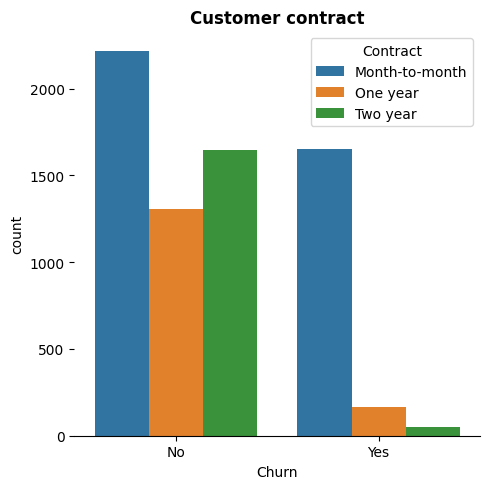

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x="Churn", hue="Contract", data=d)
plt.title("Customer contract", fontweight='bold')
plt.subplots_adjust(bottom=0.2)

plt.tight_layout()
sns.despine(left=True)
plt.show()

**Conclusion** : Month-to-Month customers are churning More

/var/folders/_7/9cgzc3b92tn02fyyg2w9jqnh0000gn/T/ipykernel_1995/3904709513.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(d.MonthlyCharges[(d["Churn"] == 'No') ],
/var/folders/_7/9cgzc3b92tn02fyyg2w9jqnh0000gn/T/ipykernel_1995/3904709513.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(d.MonthlyCharges[(d["Churn"] == 'Yes') ],


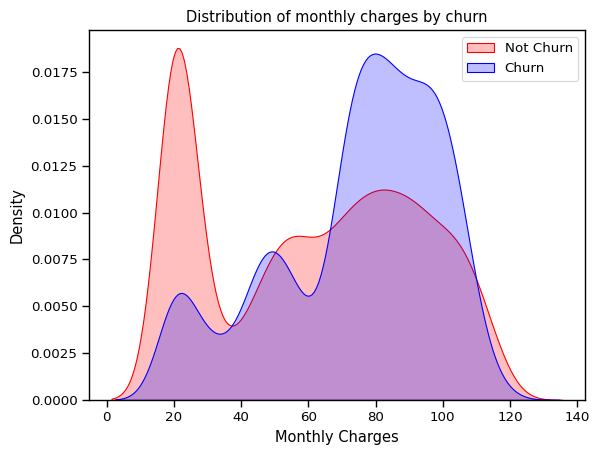

In [20]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(d.MonthlyCharges[(d["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(d.MonthlyCharges[(d["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

**Conclusion** : Customers with more monthly charges are likely to churn more

Text(0.5, 1.0, 'Payment Method')

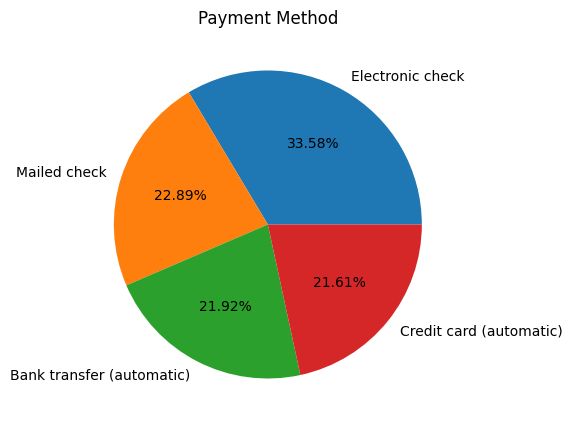

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
labels = d['PaymentMethod'].unique()
ax.pie(d['PaymentMethod'].value_counts(), labels= labels, autopct = '%1.2f%%')
ax.set_title('Payment Method')

Checking which payment method has most churns

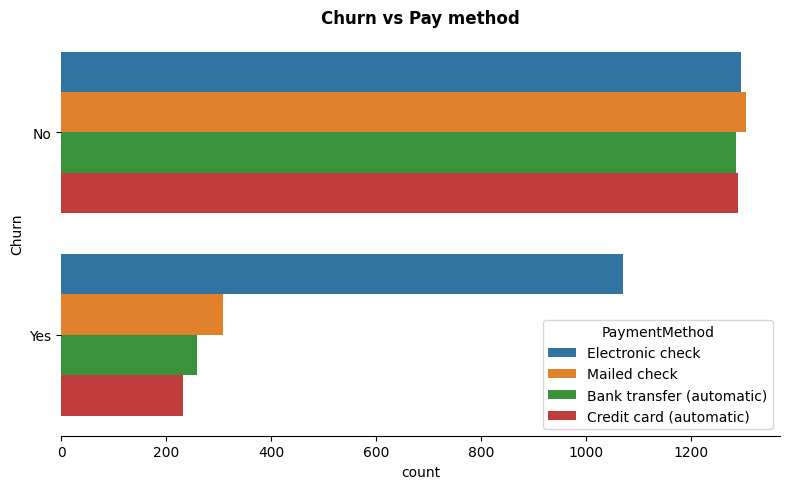

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.countplot(y="Churn", hue="PaymentMethod", data=d)
plt.title("Churn vs Pay method", fontweight='bold')
plt.subplots_adjust(bottom=0.2)

plt.tight_layout()
sns.despine(left=True)
plt.show()

**Do most of the churned customers have short tenure?**

In [14]:
d.groupby('tenure')['Churn'].value_counts(normalize=True)

tenure  Churn
0       No       1.000000
1       Yes      0.619902
        No       0.380098
2       Yes      0.516807
        No       0.483193
                   ...   
70      Yes      0.092437
71      No       0.964706
        Yes      0.035294
72      No       0.983425
        Yes      0.016575
Name: proportion, Length: 145, dtype: float64

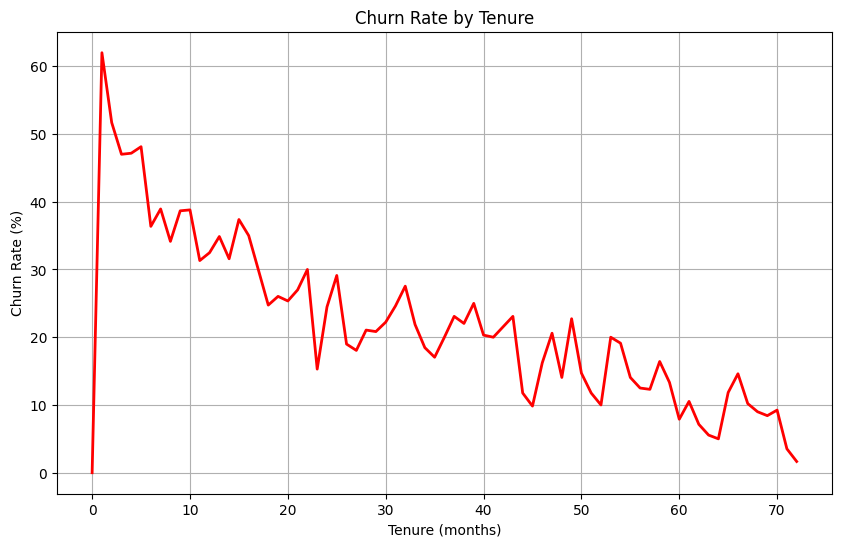

In [16]:
d['tenure'] = pd.to_numeric(d['tenure'])
churn_by_tenure = d.groupby('tenure')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)

plt.figure(figsize=(10, 6))
plt.plot(churn_by_tenure.index, churn_by_tenure.values, 'r-', linewidth=2)
plt.xlabel('Tenure (months)')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tenure')
plt.grid(True)
plt.show()

1) Customers are most likely to churn in their first few months
2) This suggests issues with onboarding, service quality, or unmet expectations

**Correlation Matrix**

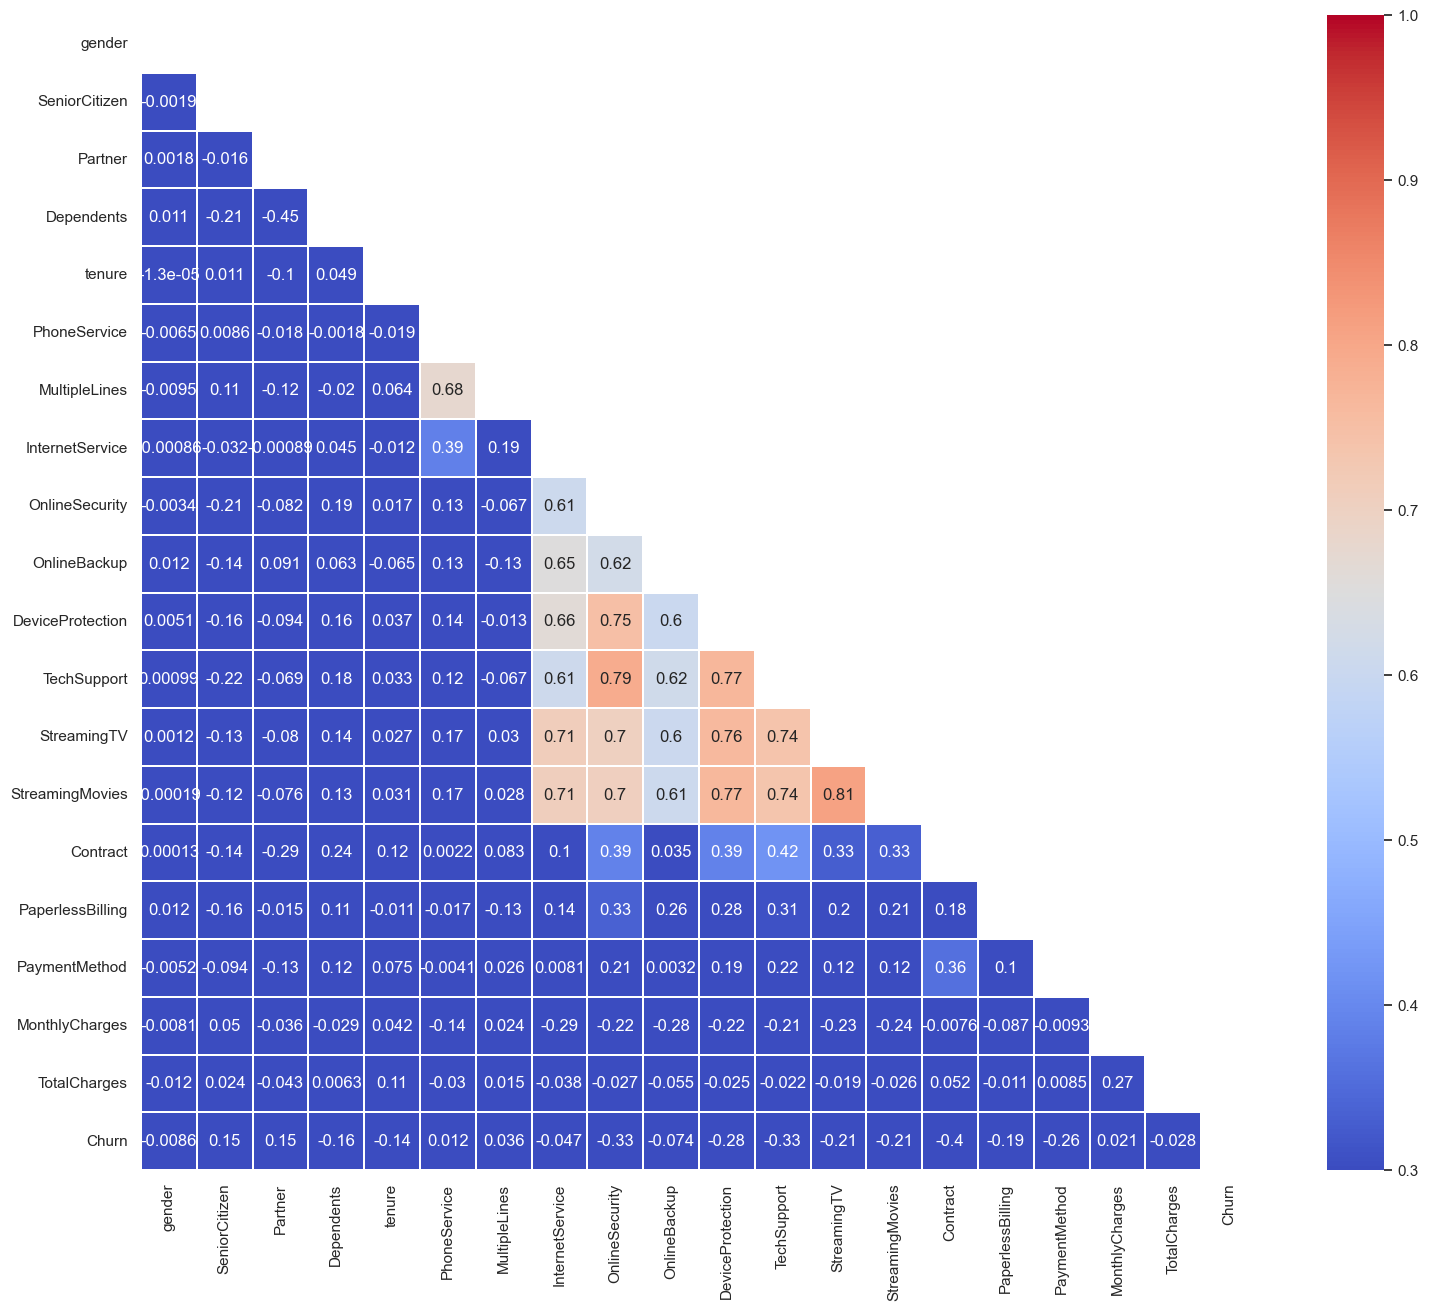

In [21]:
sns.set(style="white")
plt.figure(figsize=(18, 15))

corr = d.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=0.3, vmax=1)

***HANDLING VALUES AND FEATURES***

In [19]:
d['TotalCharges'].value_counts() 

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64